In [ ]:
# Importación de librerías para manipulación de datos
import pandas as pd

# Importación de librerías para modelado y evaluación de machine learning
#from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier



# Importación de librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

Clonado de Repositorio

In [ ]:
# @title
#!git clone -b juan1 https://github.com/Juanchumu/Aprender2016-2024.git

!git clone https://github.com/Juanchumu/Aprender2016-2024.git

Cloning into 'Aprender2016-2024'...
remote: Enumerating objects: 408, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 408 (delta 48), reused 63 (delta 24), pack-reused 296 (from 2)
Receiving objects: 100% (408/408), 129.60 MiB | 16.67 MiB/s, done.
Resolving deltas: 100% (176/176), done.
Updating files: 100% (72/72), done.


Ajustes iniciales

In [ ]:
# @title

# Define the path to the CSV file within the cloned repository
csv_file_path = '/content/Aprender2016-2024/data/processed/final.csv'

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(csv_file_path)
    print(f"Successfully loaded '{csv_file_path}' into a DataFrame.")
    # Display the first 5 rows of the DataFrame
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please ensure the repository was cloned correctly and the file exists at this path.")
except Exception as e:
    print(f"An error occurred while loading the CSV: {e}")

Successfully loaded '/content/Aprender2016-2024/data/processed/final.csv' into a DataFrame.


,ap10_Multimarca,ldesemp_Avanzado,ap02_2008,ap28j_No_disponible,Nro_Encuestados,ap27_Ninguna_falta,ap27_De_5_a_14_faltas,ap26_Blanco,ap04_Uruguay,ap19_De_1_a_5_libros,...,ap27_De_20_a_29_faltas,ap28a_Selecciona,ap07_No_disponible,ap26_No_disponible,ap28c_Selecciona,ap01_Mayo,ap04_En_un_país_de_Europa,ap10_No_disponible,ap03_Blanco,ap28d_Blanco
0,0.0,434.734796,12.494437,0.0,1532.852378,90.146648,652.826673,0.0,0.000000,480.180763,...,152.448676,577.192329,0.0,0.0,299.972372,106.790121,10.445952,0.0,0.0,0.0
1,0.0,553.412811,0.000000,0.0,1376.568307,41.487566,633.255585,0.0,3.195281,363.291326,...,29.656339,770.274412,0.0,0.0,332.242213,125.298866,8.897043,0.0,0.0,0.0
2,0.0,176.431993,1.421944,0.0,880.928706,35.348636,305.050656,0.0,0.000000,346.857917,...,72.312341,427.035868,0.0,0.0,215.723022,60.765202,4.041977,0.0,0.0,0.0
3,0.0,378.052771,0.000000,0.0,1177.369566,47.358470,557.786048,0.0,4.019519,400.502371,...,34.227559,654.781968,0.0,0.0,190.413820,75.809453,7.754366,0.0,0.0,0.0
4,0.0,110.159428,0.000000,0.0,624.519527,28.620638,250.068818,0.0,3.758785,283.223876,...,57.839111,305.332927,0.0,0.0,116.196523,70.551349,1.170484,0.0,0.0,0.0


Columnas Target:

In [ ]:
# @title

cols_target = [
    'ldesemp_Por_debajo_del_nivel_básico',
    'ldesemp_Satisfactorio',
    'ldesemp_Básico',
    'ldesemp_Avanzado','mdesemp_Por_debajo_del_nivel_básico',
    'mdesemp_Satisfactorio',
    'mdesemp_Básico',
    'mdesemp_Avanzado'
]

Se generan categorías a partir de los targets 'ldesemp_Por_debajo_del_nivel_básico', 'ldesemp_Satisfactorio', 'ldesemp_Básico', 'ldesemp_Avanzado', 'mdesemp_Por_debajo_del_nivel_básico', que representan proporciones.
Para simplificar el problema, unimos estas variables en una sola columna, clasificándolas en dos grupos:

0 → “Por debajo del nivel básico”

1 → “Los demás niveles”

De esta forma, el modelo puede entrenarse correctamente y generar una predicción binaria.

In [ ]:
# @title
cols_matematica = [
    'mdesemp_Por_debajo_del_nivel_básico',
    'mdesemp_Satisfactorio',
    'mdesemp_Básico',
    'mdesemp_Avanzado'
]

df['matematica_suma'] = df[cols_matematica[0]] + df[cols_matematica[1]] + df[cols_matematica[2]] + df[cols_matematica[3]]
df['m_bueno'] =  df[cols_matematica[1]] + df[cols_matematica[2]] + df[cols_matematica[3]]

df['m_rendimiento'] = (df[cols_matematica[0]] > df['m_bueno']).astype(int)

for col in cols_matematica:
    df[col] = df[col] / df['matematica_suma']

cols_lengua = [
    'ldesemp_Por_debajo_del_nivel_básico',
    'ldesemp_Satisfactorio',
    'ldesemp_Básico',
    'ldesemp_Avanzado'
]

df['lengua_suma'] = df[cols_lengua[0]] + df[cols_lengua[1]] + df[cols_lengua[2]] + df[cols_lengua[3]]

df['l_bueno'] =  df[cols_lengua[1]] + df[cols_lengua[2]] + df[cols_lengua[3]]

df['l_rendimiento'] = (df[cols_lengua[0]] > df['l_bueno']).astype(int)


for col in cols_lengua:
    df[col] = df[col] / df['lengua_suma']

In [ ]:
# @title
df['l_rendimiento']

,l_rendimiento
0,0
1,0
2,0
3,0
4,0
...,...
3608,0
3609,0
3610,0
3611,0


In [ ]:
# @title
df[cols_lengua].head()

,ldesemp_Por_debajo_del_nivel_básico,ldesemp_Satisfactorio,ldesemp_Básico,ldesemp_Avanzado
0,0.201925,0.375007,0.156865,0.266204
1,0.073606,0.425318,0.100621,0.400455
2,0.129788,0.478197,0.195105,0.196910
3,0.072787,0.476433,0.130874,0.319907
4,0.151069,0.483881,0.192135,0.172915


Es necesario contar con una variable de recuento para que el modelo pueda interpretar que varias columnas representan proporciones respecto de esa columna base. Como las sumas realizadas sobre las columnas objetivo no resultan útiles para este fin, se utiliza la columna Nro_encuestados como referencia de recuento.

Arrancamos con el modelado para matematica

In [ ]:
# @title


# Define the features (X) and the target (y)
columnas_a_eliminar = ['m_rendimiento','l_rendimiento','matematica_suma', 'lengua_suma', 'm_bueno','l_bueno','sector_binario'] + cols_target
X = df.drop(columns=columnas_a_eliminar)
y = df['m_rendimiento']
z = df['l_rendimiento']
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2890, 107)
X_test shape: (723, 107)
y_train shape: (2890,)
y_test shape: (723,)


# RandomForestClassifier para Matematica


Accuracy of Random Forest Classifier: 0.8036

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.64      0.74       306
           1       0.78      0.92      0.84       417

    accuracy                           0.80       723
   macro avg       0.82      0.78      0.79       723
weighted avg       0.81      0.80      0.80       723



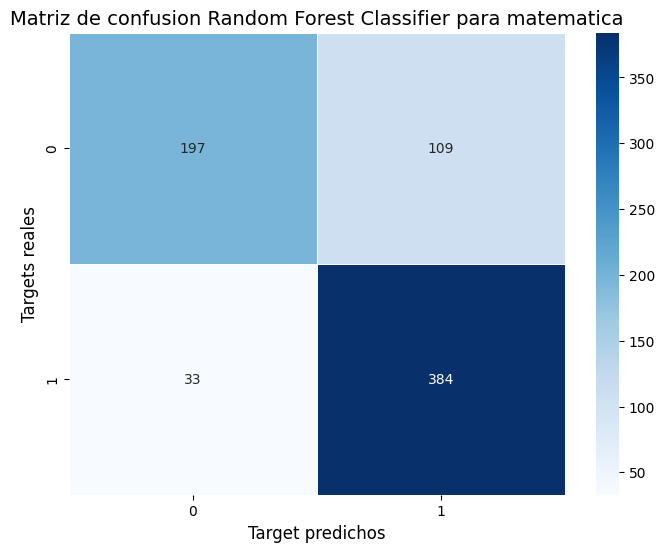

Top 20 Most Important Features for Random Forest:


,Feature,Importance
16,ap19_No_hay_libros_en_formato_papel,0.067957
69,Nivel_Ed_Padre_Terciario_universitario_posgrad...,0.052740
71,ap19_Más_de_100_libros,0.052067
91,ap19_De_51_a_100_libros,0.041410
13,Nivel_Ed_Madre_Terciario_universitario_posgrad...,0.040275
58,lat,0.037962
39,Nivel_Ed_Madre_Primaria_completo,0.032502
79,ap02_2004,0.023955
14,ap02_2005,0.023751
45,ap06_Sí,0.023615


/tmp/ipython-input-2877281037.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df_rf.head(20), palette='viridis')


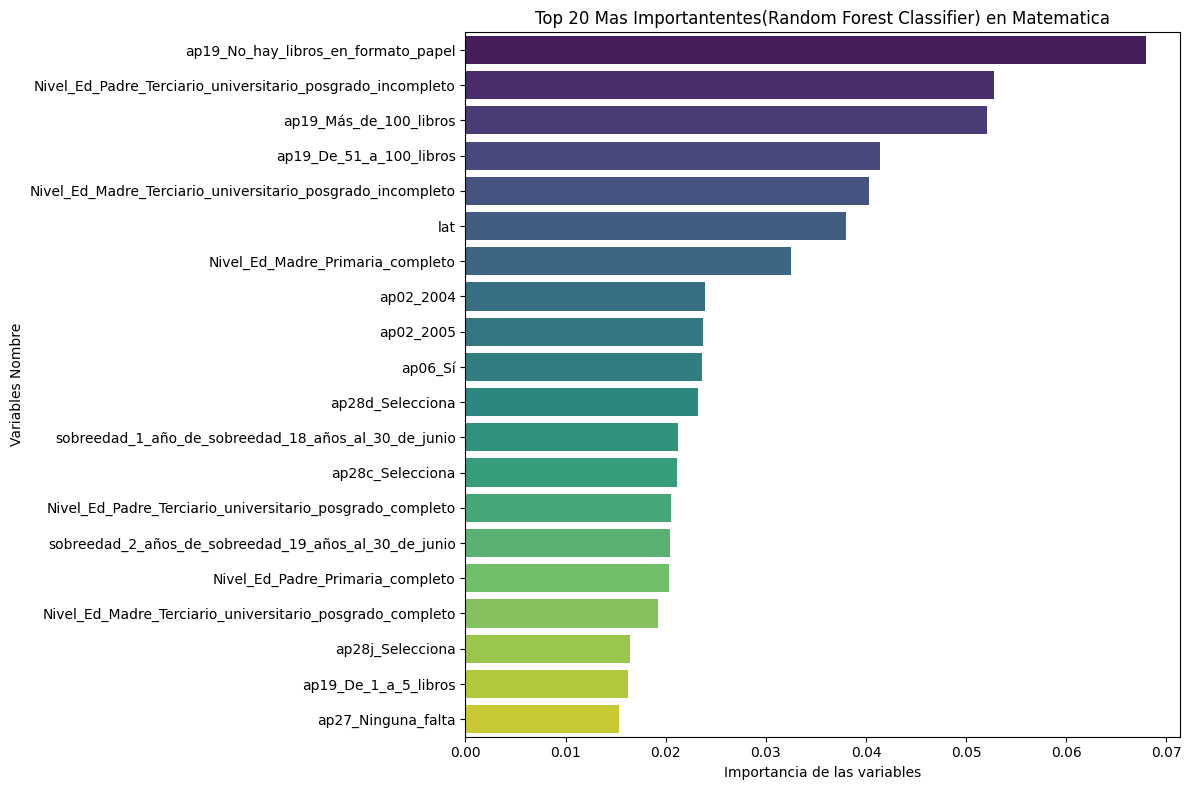

In [ ]:
# @title
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Random Forest Classifier
#rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can tune n_estimators and other parameters

rf_classifier = RandomForestClassifier(
    n_estimators=300,          # número de árboles
    max_depth=None,            # profundidad máxima (None = sin límite)
    min_samples_split=2,       # min samples para dividir un nodo
    min_samples_leaf=1,        # min samples por hoja
    max_features='sqrt',       # features a considerar en cada split
    bootstrap=True,            # muestreo con reemplazo
    class_weight=None,         # balanceo de clases ('balanced' si hay desbalance)
    random_state=42,
    n_jobs=-1                  # usa todos los cores para acelerar
)

# Train the model
rf_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_rf = pd.DataFrame(cm_rf, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_rf,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_rf.values.max(),
            annot_kws={"size": 10})

plt.title('Matriz de confusion Random Forest Classifier para matematica', fontsize=14)
plt.xlabel('Target predichos', fontsize=12)
plt.ylabel('Targets reales', fontsize=12)
plt.show()



# Get feature importances from the trained Random Forest classifier
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
features_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf
})

# Sort the features by importance in descending order
features_df_rf = features_df_rf.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
print("Top 20 Most Important Features for Random Forest:")
display(features_df_rf.head(20))

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_rf.head(20), palette='viridis')
plt.title('Top 20 Mas Importantentes(Random Forest Classifier) en Matematica')
plt.xlabel('Importancia de las variables')
plt.ylabel('Variables Nombre')
plt.tight_layout()
plt.show()

# AdaBoostClassifier para matematica

Accuracy of AdaBoost Classifier: 0.7981

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       306
           1       0.80      0.87      0.83       417

    accuracy                           0.80       723
   macro avg       0.80      0.78      0.79       723
weighted avg       0.80      0.80      0.80       723



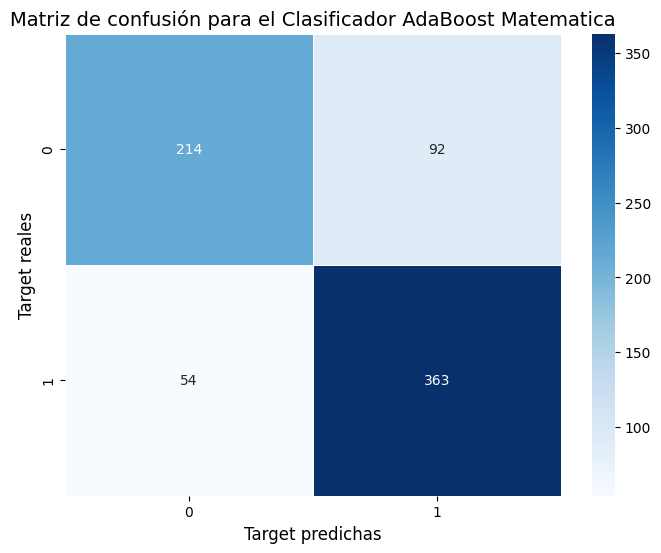

In [ ]:
# @title

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the base estimator (Decision Tree Classifier is common for AdaBoost)
# Using a shallow tree to prevent overfitting and to let AdaBoost combine weak learners
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize the AdaBoost Classifier
# n_estimators: The maximum number of estimators at which boosting is terminated.
# learning_rate: Weights applied to each classifier at each boosting iteration.
ada_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
ada_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_ada = ada_classifier.predict(X_test)

# Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy of AdaBoost Classifier: {accuracy_ada:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada, zero_division=0))

# Calculate the confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_ada = pd.DataFrame(cm_ada, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_ada,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_ada.values.max(),
            annot_kws={"size": 10})

plt.title('Matriz de confusión para el Clasificador AdaBoost Matematica', fontsize=14)
plt.xlabel('Target predichas', fontsize=12)
plt.ylabel('Target reales', fontsize=12)
plt.show()

# MLPClassifier Matematica

Accuracy: 0.8063623789764869

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       306
           1       0.83      0.84      0.83       417

    accuracy                           0.81       723
   macro avg       0.80      0.80      0.80       723
weighted avg       0.81      0.81      0.81       723



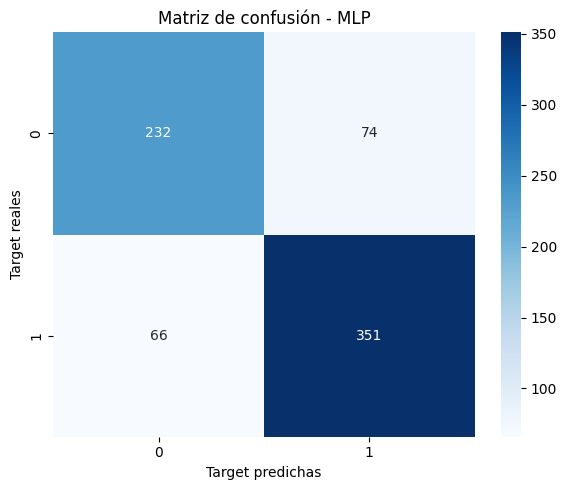


Top 20 características más importantes del MLP:
                                               Feature  Importance
92   sobreedad_1_año_de_sobreedad_18_años_al_30_de_...   10.782568
101                                   ap28c_Selecciona   10.413631
97                              ap27_De_20_a_29_faltas   10.410522
91                             ap19_De_51_a_100_libros   10.394665
13   Nivel_Ed_Madre_Terciario_universitario_posgrad...   10.382798
3                                      Nro_Encuestados   10.367043
60                                    ap28e_Selecciona   10.288271
50                                       ap04_Paraguay   10.281417
53                                          ap01_Julio   10.226590
14                                           ap02_2005   10.082201
44   sobreedad_2_años_de_sobreedad_19_años_al_30_de...   10.061266
8                                 ap19_De_1_a_5_libros   10.017838
21                                        ap01_Febrero   10.006586
45           

/tmp/ipython-input-2127417857.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')


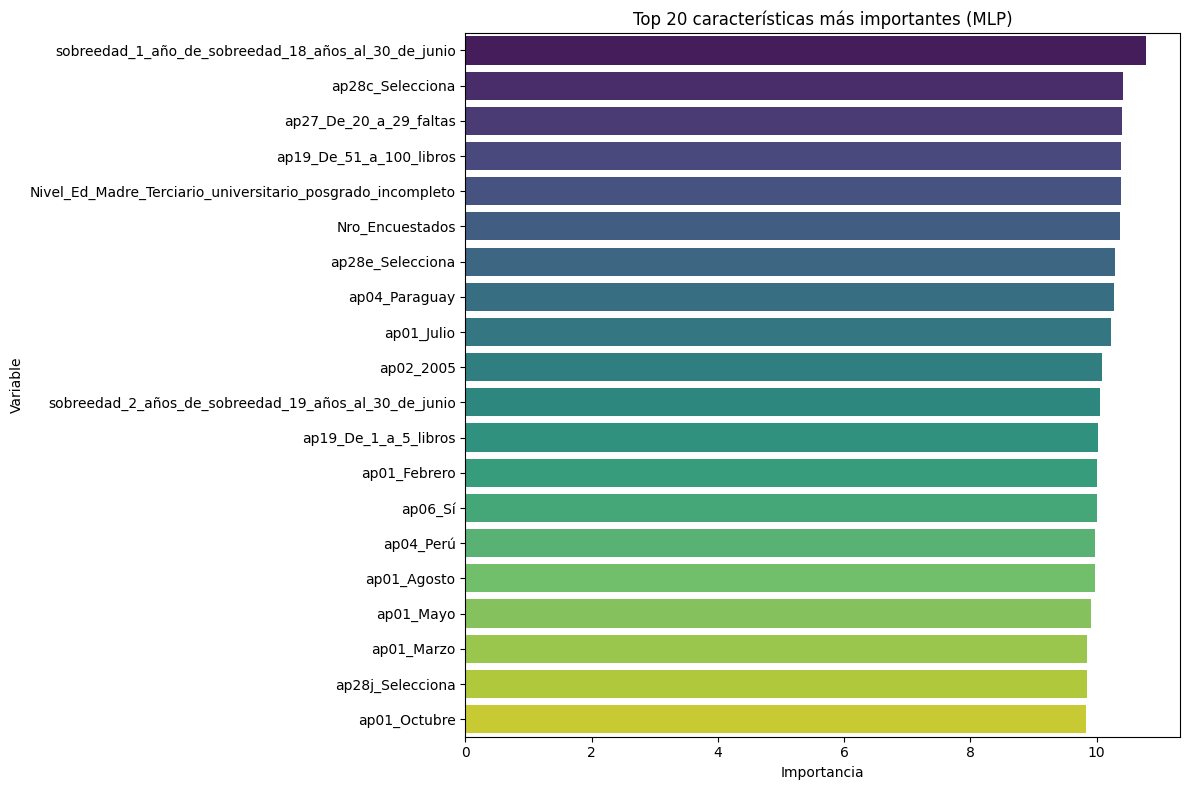

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Crear el modelo MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # dos capas ocultas
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

# 2. Entrenar
mlp.fit(X_train, y_train)

# 3. Predecir
y_pred = mlp.predict(X_test)

# 4. Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# 5. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de confusión - MLP")
plt.xlabel("Target predichas")
plt.ylabel("Target reales")
plt.tight_layout()
plt.show()

# ===========================================================
# 6. Obtener las 20 características más importantes para MLP
# ===========================================================

# Pesos de la primera capa (input -> hidden1)
input_weights = np.abs(mlp.coefs_[0])   # matriz (n_features x 128)

# Importancia = suma de los pesos absolutos por cada feature
importances = input_weights.sum(axis=1)

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Ordenar por importancia
features_df = features_df.sort_values(by='Importance', ascending=False)

print("\nTop 20 características más importantes del MLP:")
print(features_df.head(20))

# Plot de las 20 más importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')
plt.title("Top 20 características más importantes (MLP)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


Exportacion del modelo

In [ ]:
# @title
import joblib

# Define the filename for the saved model
filename = 'modelo_matematica.pkl'

# Save the trained MLP model to a .pkl file
joblib.dump(mlp, filename)

print(f"MLP model saved as {filename}")

MLP model saved as modelo_matematica.pkl


Descarga del modelo.pkl

In [ ]:
# @title
from google.colab import files

filename = 'modelo_matematica.pkl'
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# XGBoost classifier Matematica

Accuracy of XGBoost Classifier: 0.7939

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       306
           1       0.78      0.89      0.83       417

    accuracy                           0.79       723
   macro avg       0.80      0.78      0.78       723
weighted avg       0.80      0.79      0.79       723



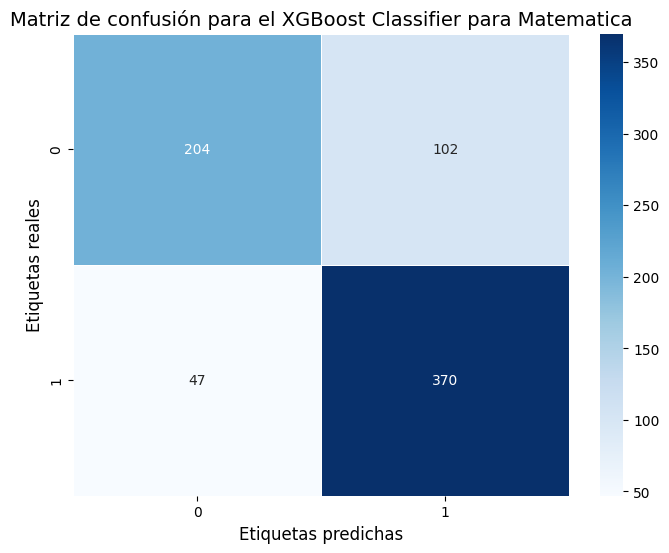

Top 20 Most Important Features for XGBoost:


,Feature,Importance
69,Nivel_Ed_Padre_Terciario_universitario_posgrad...,0.077485
16,ap19_No_hay_libros_en_formato_papel,0.071276
71,ap19_Más_de_100_libros,0.045818
58,lat,0.033159
98,ap28a_Selecciona,0.030701
91,ap19_De_51_a_100_libros,0.025263
67,ap02_Blanco,0.020425
79,ap02_2004,0.020171
44,sobreedad_2_años_de_sobreedad_19_años_al_30_de...,0.019016
92,sobreedad_1_año_de_sobreedad_18_años_al_30_de_...,0.018295


/tmp/ipython-input-1954208279.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')


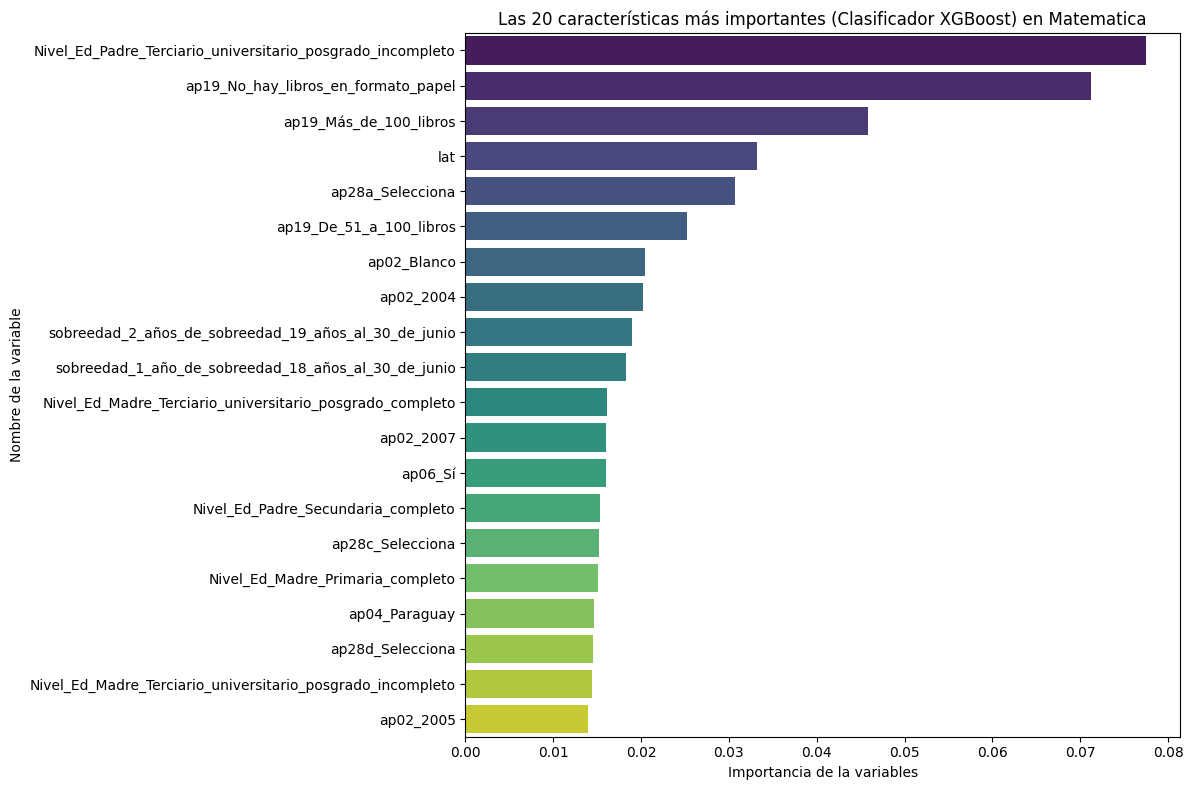

In [ ]:
# @title
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the XGBoost Classifier
# Use 'multi:softmax' for multi-class classification
# 'objective' should match the type of target variable (here, integer labels)
# n_estimators: Number of boosting rounds (trees)
# random_state for reproducibility
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax', # For multi-class classification
    num_class=len(y_train.unique()), # Number of unique classes in the target
    n_estimators=100, # Number of boosting rounds
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    eval_metric='mlogloss', # Evaluation metric for multi-class classification
    random_state=42
)

# Train the model
xgb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier: {accuracy_xgb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

# Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_xgb = pd.DataFrame(cm_xgb, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_xgb,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_xgb.values.max(),
            annot_kws={"size": 10})

plt.title('Confusion Matrix for ', fontsize=14)
plt.title('Matriz de confusión para el XGBoost Classifier para Matematica', fontsize=14)
plt.xlabel('Etiquetas predichas', fontsize=12)
plt.ylabel('Etiquetas reales', fontsize=12)
plt.show()


# Get feature importances from the trained XGBoost classifier
feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
print("Top 20 Most Important Features for XGBoost:")
display(features_df.head(20))

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')
plt.title('Las 20 características más importantes (Clasificador XGBoost) en Matematica')
plt.xlabel('Importancia de la variables')
plt.ylabel('Nombre de la variable')
plt.tight_layout()
plt.show()

Un grafico de importancias pero agrupadas:

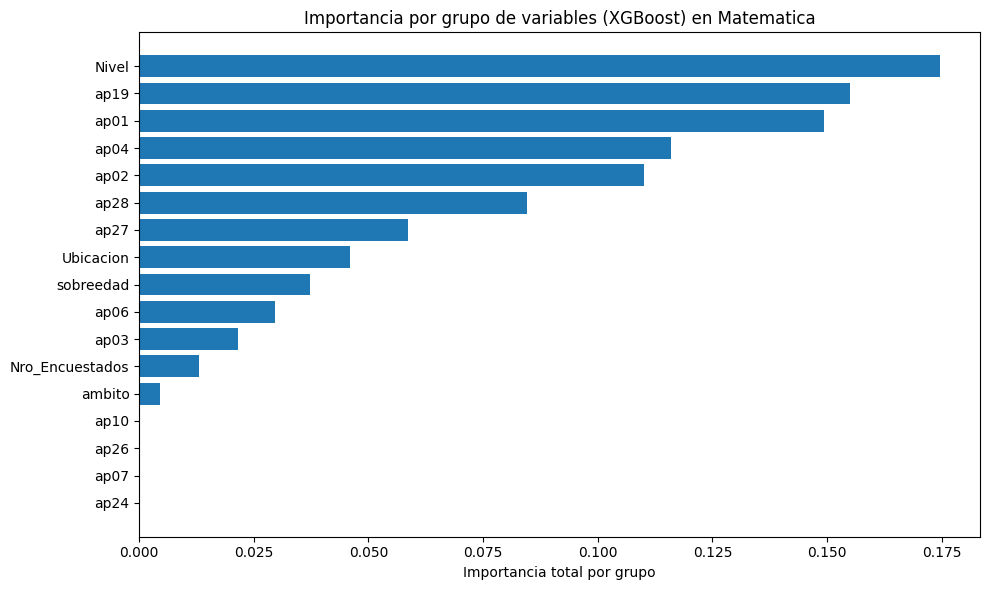

In [ ]:
# @title
import re
from collections import defaultdict

cols = features_df['Feature']  # tu array

# Reglas especiales: si la columna empieza por esto → usar este grupo exacto
reglas_especiales = {
    "lat": "Ubicacion",
    "lon": "Ubicacion",
    "Nro_Encuestados": "Nro_Encuestados",
    "ap28a": "ap28",
    "ap28c": "ap28",
    "ap28e": "ap28",
    "ap28d": "ap28",
    "ap28j": "ap28",
    # podés agregar más acá si aparecen
}

grupos = defaultdict(list)

for col in cols:
    # --- 1. Aplicar reglas especiales ---
    for prefijo, nombre_grupo in reglas_especiales.items():
        if col.startswith(prefijo):
            grupos[nombre_grupo].append(col)
            break
    else:
        # --- 2. Si no cae en una regla especial ---
        if "_" in col:
            grupo = col.split("_")[0]
        else:
            grupo = re.match(r"[A-Za-z]+", col).group()
        grupos[grupo].append(col)

grupos = dict(grupos)

import matplotlib.pyplot as plt

# ====================================
# 1. Convertir el DF en un dict rápido
# ====================================

# Esto produce: {"columna1": 0.12, "columna2": 0.03, ...}
importancias = dict(zip(features_df['Feature'], features_df['Importance']))

# ====================================
# 2. Calcular importancia total por grupo
# ====================================

importancia_grupos = {}

for grupo, columnas in grupos.items():
    importancia_grupos[grupo] = sum(importancias.get(col, 0) for col in columnas)

# ====================================
# 3. Ordenar grupos de mayor a menor
# ====================================

importancia_grupos = dict(
    sorted(importancia_grupos.items(), key=lambda x: x[1], reverse=True)
)

# ====================================
# 4. Graficar
# ====================================

plt.figure(figsize=(10, 6))
plt.barh(list(importancia_grupos.keys()), list(importancia_grupos.values()))
plt.xlabel("Importancia total por grupo")
plt.title("Importancia por grupo de variables (XGBoost) en Matematica")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

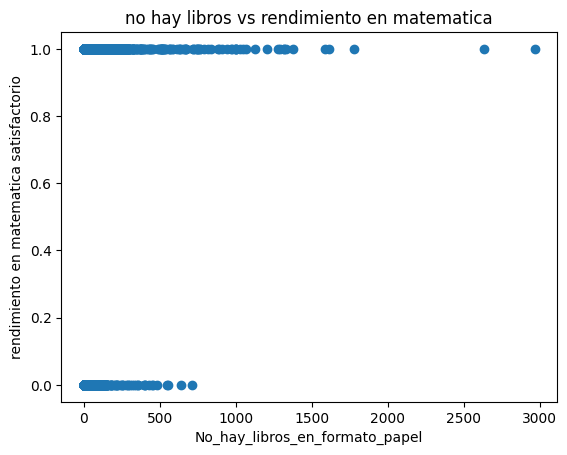

In [ ]:
# @title
plt.scatter(df['ap19_No_hay_libros_en_formato_papel'], df['m_rendimiento'])
plt.xlabel('No_hay_libros_en_formato_papel')
plt.ylabel('rendimiento en matematica satisfactorio')
plt.title('no hay libros vs rendimiento en matematica')
plt.show()

# Lengua

# Random Foresta Lengua

Accuracy of Random Forest Classifier: 0.9723

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       703
           1       0.00      0.00      0.00        20

    accuracy                           0.97       723
   macro avg       0.49      0.50      0.49       723
weighted avg       0.95      0.97      0.96       723



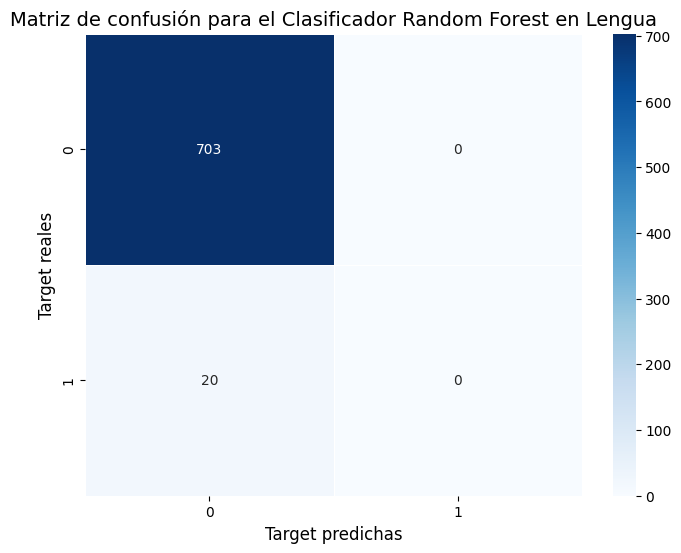

Top 20 Most Important Features for Random Forest:


,Feature,Importance
84,ap03_Femenino,0.028833
54,ap28d_Selecciona,0.026674
39,Nivel_Ed_Madre_Primaria_completo,0.025285
33,ap06_No,0.024892
98,ap28a_Selecciona,0.024701
16,ap19_No_hay_libros_en_formato_papel,0.024607
64,ap02_2007,0.024588
5,ap27_De_5_a_14_faltas,0.023805
29,Nivel_Ed_Padre_Secundaria_completo,0.023479
55,ap04_Argentina,0.022613


/tmp/ipython-input-459408910.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df_rf.head(20), palette='viridis')


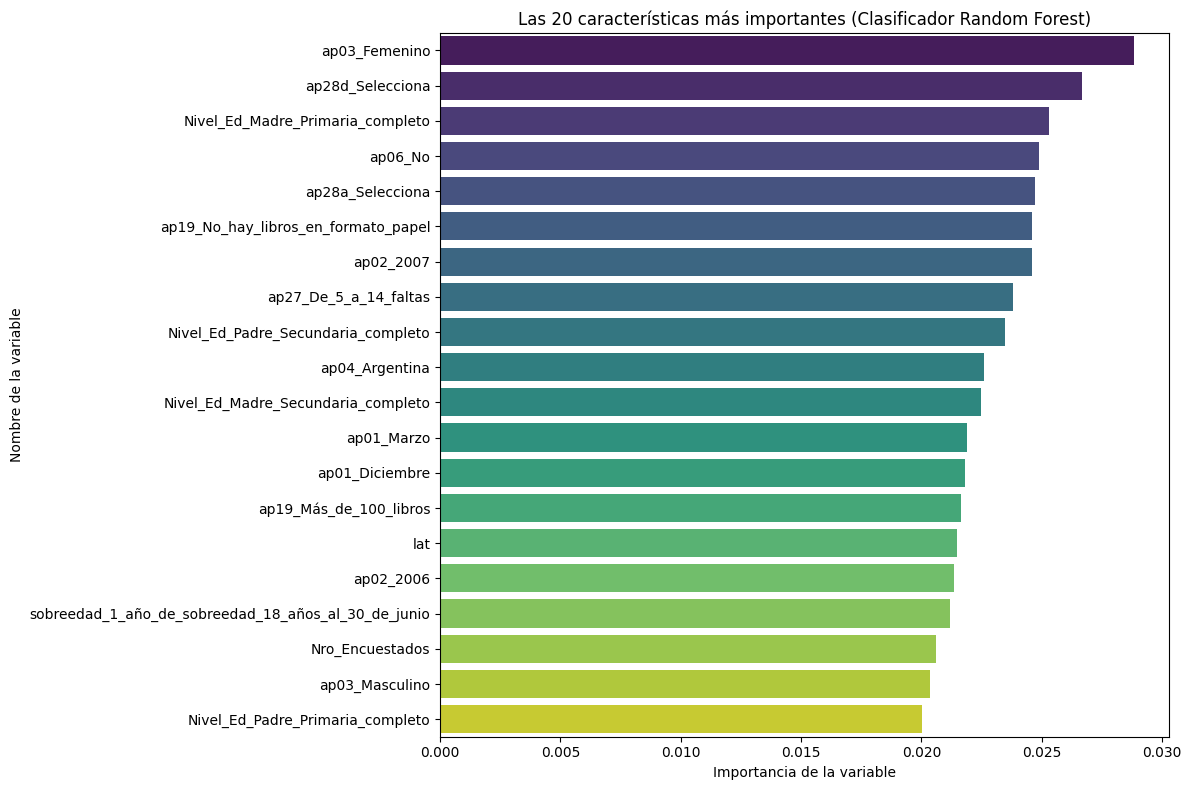

In [ ]:
# @title
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=42)
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can tune n_estimators and other parameters

# Train the model
rf_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_rf = pd.DataFrame(cm_rf, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_rf,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_rf.values.max(),
            annot_kws={"size": 10})

plt.title('Matriz de confusión para el Clasificador Random Forest en Lengua', fontsize=14)
plt.xlabel('Target predichas', fontsize=12)
plt.ylabel('Target reales', fontsize=12)
plt.show()



# Get feature importances from the trained Random Forest classifier
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
features_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf
})

# Sort the features by importance in descending order
features_df_rf = features_df_rf.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
print("Top 20 Most Important Features for Random Forest:")
display(features_df_rf.head(20))

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_rf.head(20), palette='viridis')
plt.title('Las 20 características más importantes (Clasificador Random Forest)')
plt.xlabel('Importancia de la variable')
plt.ylabel('Nombre de la variable')
plt.tight_layout()
plt.show()

Exportacion del modelo

In [ ]:
# @title
import joblib

# Define the filename for the saved model
filename = 'modelo_lengua.pkl'

# Save the trained rf_clasifier model to a .pkl file
joblib.dump(rf_classifier, filename)

print(f"rf_classifier model saved as {filename}")

rf_classifier model saved as modelo_lengua.pkl


Descarga del modelo_lengua.pkl

In [ ]:
# @title
from google.colab import files

filename = 'modelo_lengua.pkl'
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Version de modelo utilizado para utilizarlo en el requeriments.txt de streamlit

In [ ]:

import sklearn
print(f"scikit-learn version: {sklearn.__version__}")


scikit-learn version: 1.6.1


# AdaBoost Classifier para Lengua

Accuracy of AdaBoost Classifier: 0.9723

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       703
           1       0.00      0.00      0.00        20

    accuracy                           0.97       723
   macro avg       0.49      0.50      0.49       723
weighted avg       0.95      0.97      0.96       723



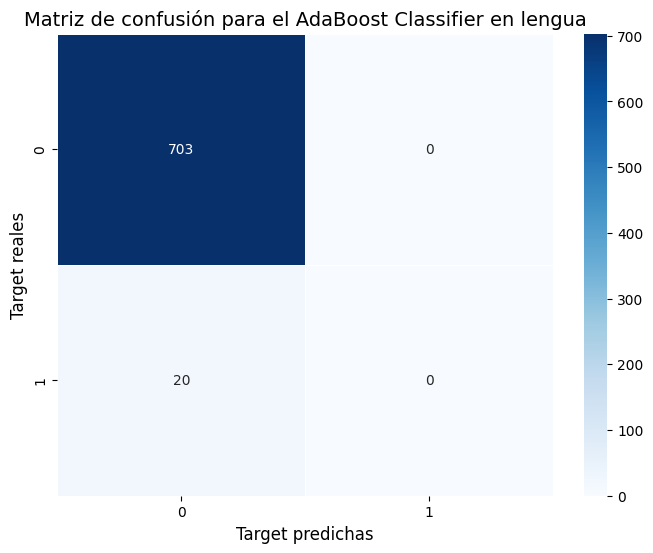

In [ ]:
# @title
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=42)
# Initialize the base estimator (Decision Tree Classifier is common for AdaBoost)
# Using a shallow tree to prevent overfitting and to let AdaBoost combine weak learners
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize the AdaBoost Classifier
# n_estimators: The maximum number of estimators at which boosting is terminated.
# learning_rate: Weights applied to each classifier at each boosting iteration.
ada_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
ada_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_ada = ada_classifier.predict(X_test)

# Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy of AdaBoost Classifier: {accuracy_ada:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada, zero_division=0))

# Calculate the confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_ada = pd.DataFrame(cm_ada, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_ada,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_ada.values.max(),
            annot_kws={"size": 10})

plt.title('Matriz de confusión para el AdaBoost Classifier en lengua', fontsize=14)
plt.xlabel('Target predichas', fontsize=12)
plt.ylabel('Target reales', fontsize=12)
plt.show()

Accuracy: 0.9612724757952974

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       703
           1       0.21      0.15      0.18        20

    accuracy                           0.96       723
   macro avg       0.60      0.57      0.58       723
weighted avg       0.95      0.96      0.96       723



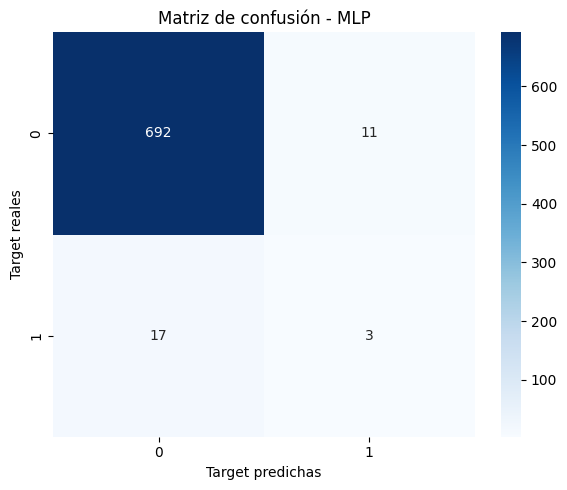

In [ ]:
# @title

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=42)

# 1. Crear el modelo MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # dos capas ocultas
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

# 2. Entrenar
mlp.fit(X_train, y_train)

# 3. Predecir
y_pred = mlp.predict(X_test)

# 4. Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# 5. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de confusión - MLP")
plt.xlabel("Target predichas")
plt.ylabel("Target reales")
plt.tight_layout()
plt.show()

#XGBoost lengua

Accuracy of XGBoost Classifier: 0.9710

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       703
           1       0.00      0.00      0.00        20

    accuracy                           0.97       723
   macro avg       0.49      0.50      0.49       723
weighted avg       0.95      0.97      0.96       723



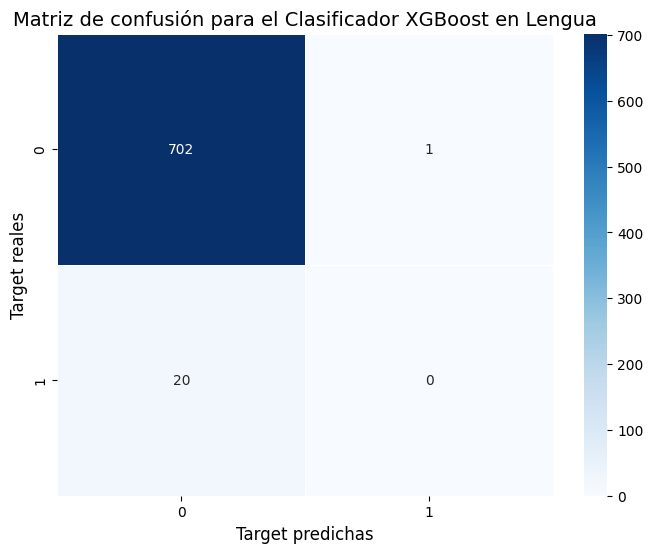

Top 20 Most Important Features for XGBoost:


,Feature,Importance
91,ap19_De_51_a_100_libros,0.041295
54,ap28d_Selecciona,0.038552
69,Nivel_Ed_Padre_Terciario_universitario_posgrad...,0.038313
55,ap04_Argentina,0.035048
64,ap02_2007,0.028432
18,ap01_Marzo,0.027913
57,ap04_En_un_país_de_Asia,0.026634
66,Nivel_Ed_Madre_Terciario_universitario_posgrad...,0.025504
39,Nivel_Ed_Madre_Primaria_completo,0.025206
5,ap27_De_5_a_14_faltas,0.024061


/tmp/ipython-input-1541699961.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')


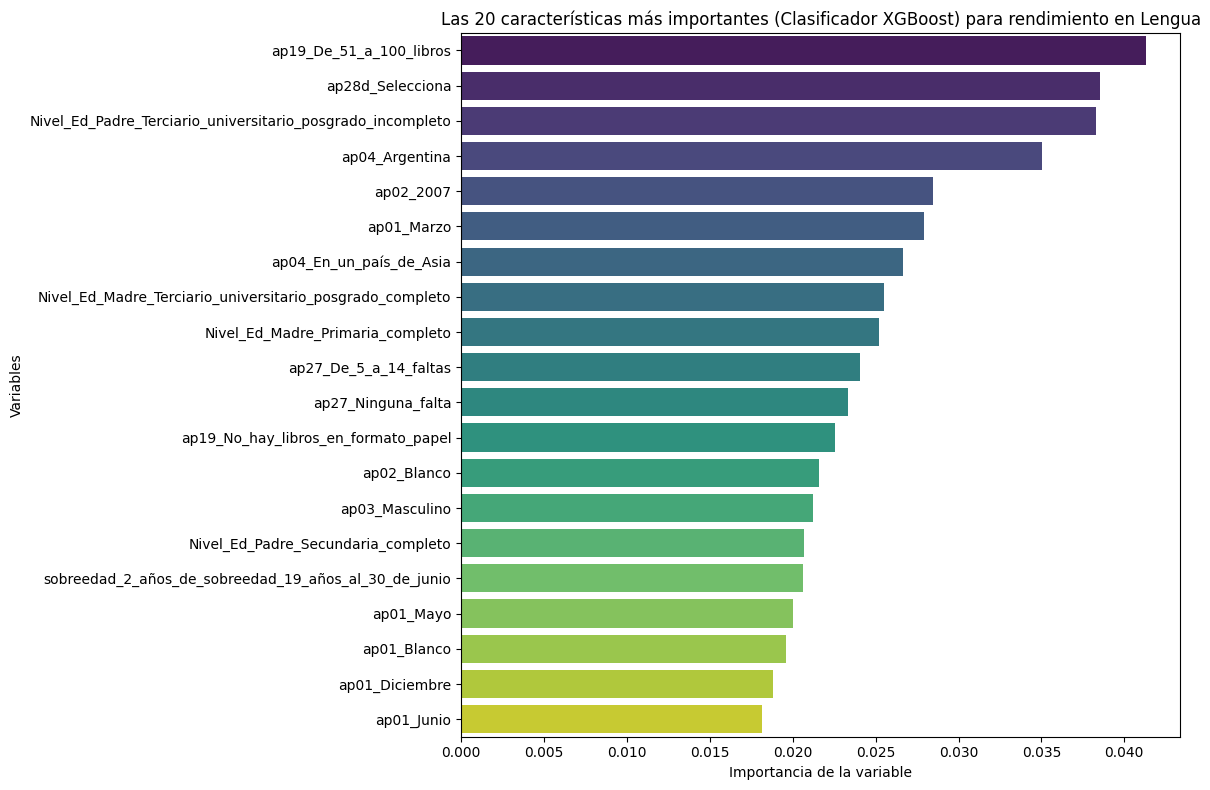

In [ ]:
# @title
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=42)
# Initialize the XGBoost Classifier
# Use 'multi:softmax' for multi-class classification
# 'objective' should match the type of target variable (here, integer labels)
# n_estimators: Number of boosting rounds (trees)
# random_state for reproducibility
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax', # For multi-class classification
    num_class=len(y_train.unique()), # Number of unique classes in the target
    n_estimators=100, # Number of boosting rounds
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    eval_metric='mlogloss', # Evaluation metric for multi-class classification
    random_state=42
)

# Train the model
xgb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier: {accuracy_xgb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

# Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_xgb = pd.DataFrame(cm_xgb, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_xgb,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_xgb.values.max(),
            annot_kws={"size": 10})

plt.title('Matriz de confusión para el Clasificador XGBoost en Lengua', fontsize=14)
plt.xlabel('Target predichas', fontsize=12)
plt.ylabel('Target reales', fontsize=12)
plt.show()


# Get feature importances from the trained XGBoost classifier
feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
print("Top 20 Most Important Features for XGBoost:")
display(features_df.head(20))

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')
plt.title('Las 20 características más importantes (Clasificador XGBoost) para rendimiento en Lengua')
plt.xlabel('Importancia de la variable')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

Importancias, agrupadas

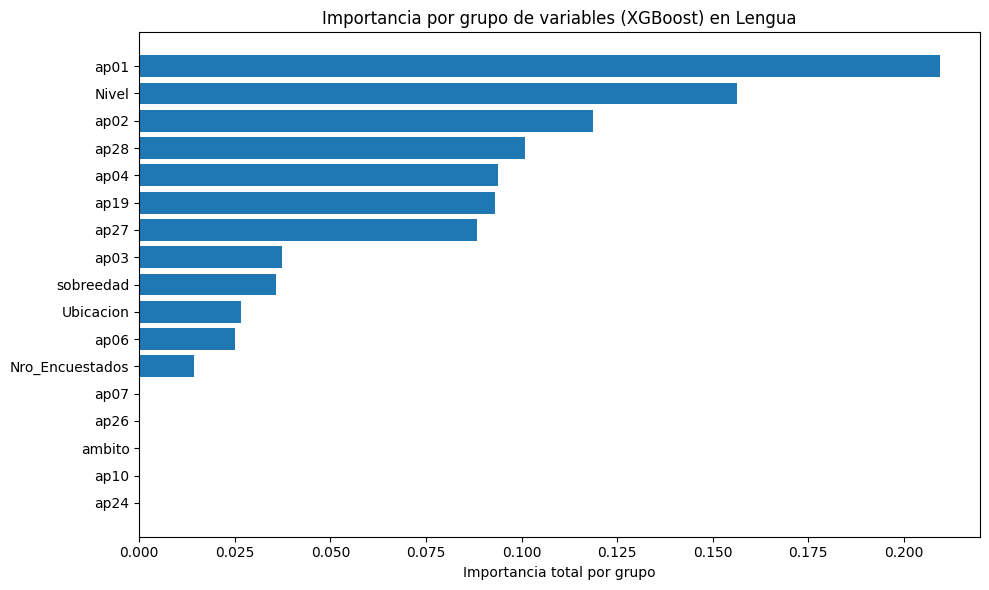

In [ ]:
# @title
import re
from collections import defaultdict

cols = features_df['Feature']  # tu array

# Reglas especiales: si la columna empieza por esto → usar este grupo exacto
reglas_especiales = {
    "lat": "Ubicacion",
    "lon": "Ubicacion",
    "Nro_Encuestados": "Nro_Encuestados",
    "ap28a": "ap28",
    "ap28c": "ap28",
    "ap28e": "ap28",
    "ap28d": "ap28",
    "ap28j": "ap28",
    # podés agregar más acá si aparecen
}

grupos = defaultdict(list)

for col in cols:
    # --- 1. Aplicar reglas especiales ---
    for prefijo, nombre_grupo in reglas_especiales.items():
        if col.startswith(prefijo):
            grupos[nombre_grupo].append(col)
            break
    else:
        # --- 2. Si no cae en una regla especial ---
        if "_" in col:
            grupo = col.split("_")[0]
        else:
            grupo = re.match(r"[A-Za-z]+", col).group()
        grupos[grupo].append(col)

grupos = dict(grupos)

import matplotlib.pyplot as plt

# ====================================
# 1. Convertir el DF en un dict rápido
# ====================================

# Esto produce: {"columna1": 0.12, "columna2": 0.03, ...}
importancias = dict(zip(features_df['Feature'], features_df['Importance']))

# ====================================
# 2. Calcular importancia total por grupo
# ====================================

importancia_grupos = {}

for grupo, columnas in grupos.items():
    importancia_grupos[grupo] = sum(importancias.get(col, 0) for col in columnas)

# ====================================
# 3. Ordenar grupos de mayor a menor
# ====================================

importancia_grupos = dict(
    sorted(importancia_grupos.items(), key=lambda x: x[1], reverse=True)
)

# ====================================
# 4. Graficar
# ====================================

plt.figure(figsize=(10, 6))
plt.barh(list(importancia_grupos.keys()), list(importancia_grupos.values()))
plt.xlabel("Importancia total por grupo")
plt.title("Importancia por grupo de variables (XGBoost) en Lengua")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Ultimos datos para funcionamiento de el streamlit:

In [ ]:
colz = ["Nro_Encuestados",'lat','lon']

for i in colz:
  media = df[i].mean()
  desvio = df[i].std()
  minimo = df[i].min()
  maximo = df[i].max()

  print(f"Columna: {i}")
  print("Media:", media)
  print("Desvío estándar:", desvio)
  print("Mínimo:", minimo)
  print("Máximo:", maximo)
  print("")

Columna: Nro_Encuestados
Media: 450.5693316069762
Desvío estándar: 947.8707065887041
Mínimo: 0.96415389
Máximo: 15793.329914

Columna: lat
Media: -32.12126320531414
Desvío estándar: 5.015501524834286
Mínimo: -54.807306
Máximo: -21.9470472

Columna: lon
Media: -62.33453431621921
Desvío estándar: 4.067451999142001
Mínimo: -72.4188019
Máximo: -54.0378533



graficos de ambito rural y urbano
graficos de sector privado y publico